In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Store the data
FB=pd.read_csv("FB21.csv")
# Show the first 5 elements of the data
FB.head()

,date,Open Price,High Price,Low Price,Close Price,Adj Close Price
0,12/22/2020,149.36,172.89,154.44,165.74,5932.33
1,12/23/2020,133.44,151.33,156.58,132.13,1490.43
2,12/24/2020,162.90,175.19,121.02,189.89,1871.66
3,12/25/2020,126.64,174.82,145.55,117.29,5382.13
4,12/26/2020,151.14,188.93,192.14,186.16,7230.14


In [3]:
# Set the date as the Index for the data
FB = FB.set_index(pd.DatetimeIndex(FB["date"].values))
# Show the data
FB

,date,Open Price,High Price,Low Price,Close Price,Adj Close Price
2020-12-22,12/22/2020,149.36,172.89,154.44,165.74,5932.33
2020-12-23,12/23/2020,133.44,151.33,156.58,132.13,1490.43
2020-12-24,12/24/2020,162.90,175.19,121.02,189.89,1871.66
2020-12-25,12/25/2020,126.64,174.82,145.55,117.29,5382.13
2020-12-26,12/26/2020,151.14,188.93,192.14,186.16,7230.14
...,...,...,...,...,...,...
2021-03-27,3/27/2021,111.71,116.62,180.99,101.72,7552.84
2021-03-28,3/28/2021,155.78,103.16,163.32,137.20,3838.27
2021-03-29,3/29/2021,125.49,142.18,102.18,184.70,7196.29
2021-03-30,3/30/2021,199.06,116.84,168.41,166.24,5586.83


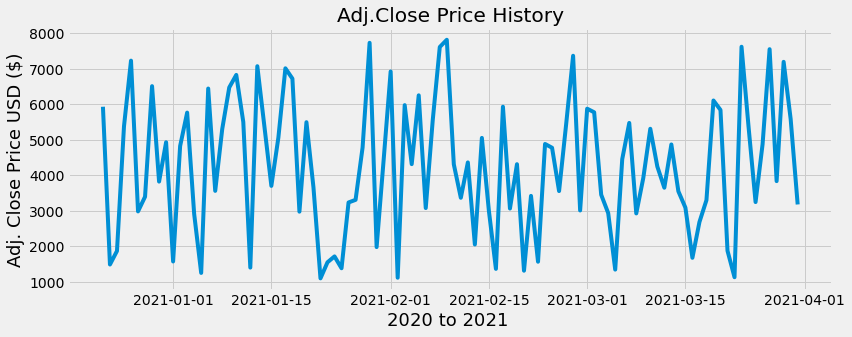

In [4]:
# Visually show the price
plt.figure(figsize=(12.2, 4.5))
plt.plot(FB.index,FB["Adj Close Price"], label = "Adj Close Price")
plt.title("Adj.Close Price History")
plt.xlabel("2020 to 2021 ", fontsize = 18)
plt.ylabel("Adj. Close Price USD ($)",fontsize=18)
plt.show()

In [5]:
# Prepare the data to Calculate the RSI

# Get the difference in price
delta = FB['Adj Close Price'].diff(1)
delta

2020-12-22        NaN
2020-12-23   -4441.90
2020-12-24     381.23
2020-12-25    3510.47
2020-12-26    1848.01
               ...   
2021-03-27    2674.53
2021-03-28   -3714.57
2021-03-29    3358.02
2021-03-30   -1609.46
2021-03-31   -2405.18
Name: Adj Close Price, Length: 100, dtype: float64

In [6]:
# Get rid of NaN
delta = delta.dropna()
delta

2020-12-23   -4441.90
2020-12-24     381.23
2020-12-25    3510.47
2020-12-26    1848.01
2020-12-27   -4244.60
               ...   
2021-03-27    2674.53
2021-03-28   -3714.57
2021-03-29    3358.02
2021-03-30   -1609.46
2021-03-31   -2405.18
Name: Adj Close Price, Length: 99, dtype: float64

In [7]:
# Get the positive gains (up) and the negative gains (down)
up = delta.copy()
down= delta.copy()
up[up<0] = 0
down[down>0] = 0

In [8]:
# Get the time period
period = 14
# Calculate the average gain and the average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [10]:
# Calculate the RSI

# Calculate the Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
# Calculate the Relative Strength Index (RSI)
RSI = 100.0 - (100.0 / (1.0 + RS))

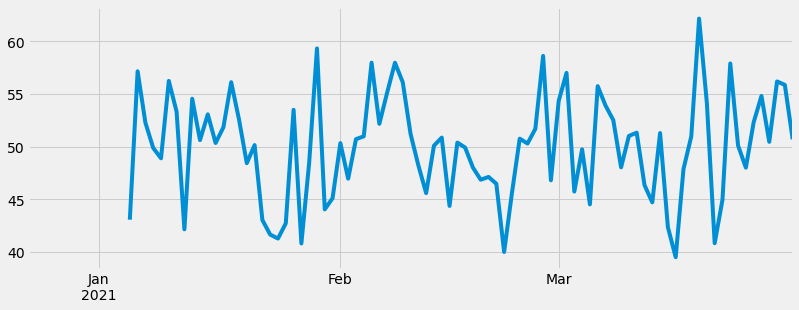

In [11]:
#Show the RSI Visually
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

In [12]:
# Put it all together

# Create a new data frame
new_df = pd.DataFrame()
new_df['Adj Close Price'] = FB['Adj Close Price']
new_df['RSI']=RSI
new_df

,Adj Close Price,RSI
2020-12-22,5932.33,NaN
2020-12-23,1490.43,NaN
2020-12-24,1871.66,NaN
2020-12-25,5382.13,NaN
2020-12-26,7230.14,NaN
...,...,...
2021-03-27,7552.84,54.831070
2021-03-28,3838.27,50.474725
2021-03-29,7196.29,56.206553
2021-03-30,5586.83,55.875488


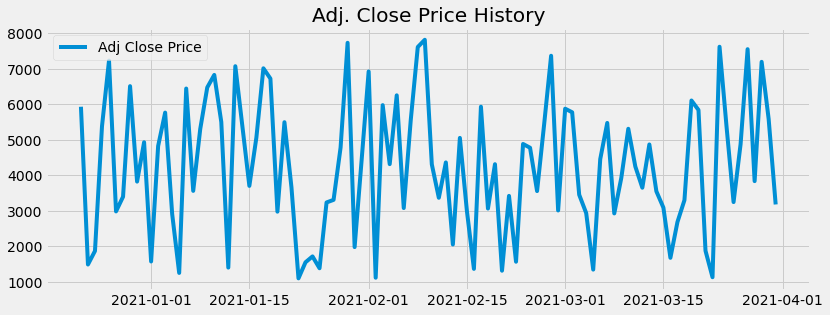

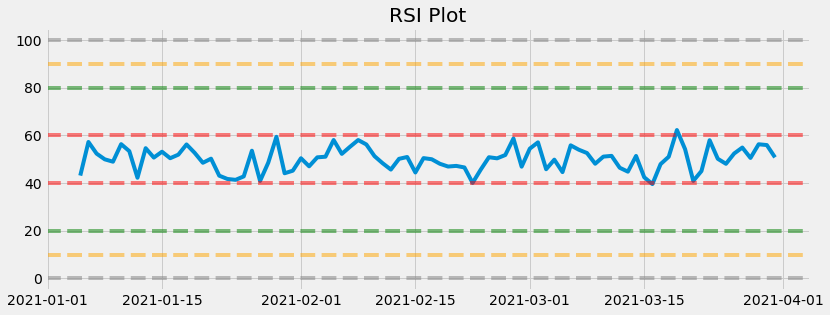

In [14]:
# Visually show the adjusted close price and RSI

# Plot the adjusted close price
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['Adj Close Price'])
plt.title('Adj. Close Price History')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()
# Plot the corresponding RSI values and significant levels
plt.figure(figsize=(12.2,4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0,linestyle='--', alpha = 0.5, color='gray')
plt.axhline(10,linestyle='--', alpha = 0.5, color='orange')
plt.axhline(20,linestyle='--', alpha = 0.5, color='green')
plt.axhline(40,linestyle='--', alpha = 0.5, color='red')
plt.axhline(60,linestyle='--', alpha = 0.5, color='red')
plt.axhline(80,linestyle='--', alpha = 0.5, color='green')
plt.axhline(90,linestyle='--', alpha = 0.5, color='orange')
plt.axhline(100,linestyle='--', alpha = 0.5, color='gray')
plt.show()